✅：コードの実行確認

🔄：テキスト内容の確認

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Statistics (a)より抜粋

# Portfolio Optimization（ポートフォリオ最適化）

現代ポートフォリオ理論（平均分散ポートフォリオ理論）は、金融理論の主要な基礎である。

この理論的ブレークスルーに基づき、1990年にノーベル経済学賞がその考案者であるハリー・マーコウィッツに授与された。

1950年代に定式化された理論ではあるが、今日でもファイナンスを学ぶ学生に教えられ、実務に応用されている

（多くの場合、若干の修正、あるいは大幅な修正が加えられている）

**このセクションでは、理論の基本原理を説明する**

Copeland, Weston, and Shastri (2005)の本の第5章は、MPTに関連する正式なトピックを紹介している。先に指摘したように、正規分布のリターンを仮定することは理論の基本である： 

平均と分散だけに注目することで、私たちは必然的に、期末の富の分布を記述するために他の統計量は必要ないと仮定していることになる。投資家が 投資家が特殊な効用関数（二次効用関数）を持っていない限り、リターンは正規分布を持つと仮定する必要がある。リターンは正規分布を持つと仮定する必要がある。平均と分散で完全に記述できる。

### The Data（データ）

以下の分析と例では、これまでと同じ金融商品を使用します。
MPT の基本的な考え方は、分散化を利用して、目標収益レベルを前提としてポートフォリオ リスクを最小限に抑えるか、または一定のリスク レベルを前提としてポートフォリオ リターンを最大化することです。このような分散化効果は、多数の資産と資産の一定の多様性を適切に組み合わせることで期待できます。

ただし、基本的な考え方を伝え、典型的な効果を示すには、4 つの金融商品で十分です。



In [3]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd

In [4]:
raw = pd.read_csv(r'C:\Users\20222305\ILLARTS_Works\Python\Python_for_Finance_2ed\source\tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [5]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']  

In [6]:
noa = len(symbols)  

In [7]:
data = raw[symbols]

In [8]:
rets = np.log(data / data.shift(1))

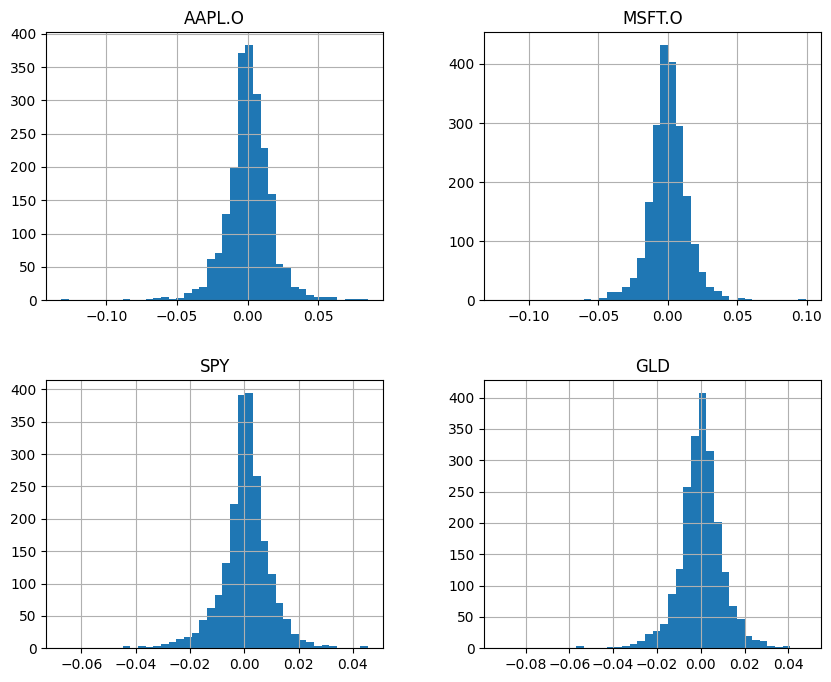

In [9]:
rets.hist(bins=40, figsize=(10, 8));

# 金融商品の対数収益率のヒストグラム

投資する金融商品の共分散行列がポートフォリオ選択過程の中心です。

Pandasには同じスケーリング因子を適用する共分散行列を生成する組み込みメソッドがあります。 

In [10]:
rets.mean() * 252  

# 年率平均収益

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [11]:
rets.cov() * 252  

# 年率共分散行列

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


# The Basic Theory（基本理論）

以下では、投資家が金融商品でショートポジションを設定することはできないと仮定しています。

ロングポジションしか許されていないので、投資家資産の100%が全ポジションがロング（正）かつ、ポジションを足し合わせた合計が100%になるように投資可能な金融商品が分散されることを意味します

４商品を例えば、各商品ごとに等しい金額。すなわちそれぞれの資産の25％を投資したとしましょう。

以下のコードでは0~1の一様分布に従う乱数を４つ生成し、総和が1になるように値を正規化する。

In [12]:
weights = np.random.random(noa)  
# ランダムポートフォリオの重み。0~1の一様分布に従う乱数を４つ生成

weights /= np.sum(weights)
# 1（100%）に正規化する

In [13]:
weights
# 正規化された乱数を４つ表示する

array([0.17204695, 0.00152735, 0.32194193, 0.50448377])

In [14]:
weights.sum()
# 合計が1（100%）になることの確認。

np.float64(1.0)

ここで検証されているように、重みは確かに合計で1になります。

つまり、
$
\sum _{I} w_{i} = 1 
$
です。

- $I$ は金融商品の数、
- $w_{i} >0$ は金融商品iの重み。

下記の式は、単一商品の重みが与えられた場合のポートフォリオの期待収益の式を示しています。

これは、過去の平均パフォーマンスが将来の (期待) パフォーマンスの最良の推定値であると想定されるという意味で、ポートフォリオの期待収益です。

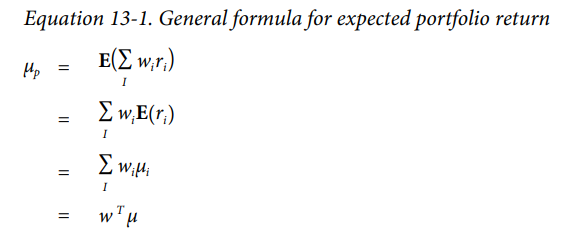

- $r_{i}$ ：状態依存の将来の収益 (収益値が正規分布していると想定されるベクトル) 
- $mu _{i}$ ：商品$i$ の期待収益
- $w_{T}$ ：重みベクトルの転置
- $\mu $ ：期待される証券収益のベクトル



この式をPythonで表現すると、年率の計算も入れて１行で書くことができる

In [58]:
np.sum(rets.mean() * weights) * 252  

# 与えられたポートフォリオの重みによる年率ポートフォリオ収益

np.float64(0.10205749927177661)

MPT における 2 つ目の重要なオブジェクトは、**ポートフォリオの期待分散** です。2 つの証券間の共分散は、

$
\sigma _{ij} = \sigma _{ji} = E(r_{i} – \mu _{i})(r_{j} – \mu _{j}) 
$

で定義され、１つの証券の分散は自分自身との共分散: 

$
σ^2_{i} = E((r_{i} – \mu _{i})^2)
$

という風に定義できる。

図13-1は、証券ポートフォリオの共分散行列を示しています (すべての証券の重みが 1 であると仮定)。

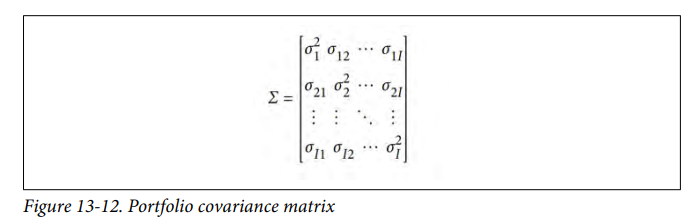

ポートフォリオ共分散行列を用いると、式13-2は期待ポートフォリオ分散の式を提供します。

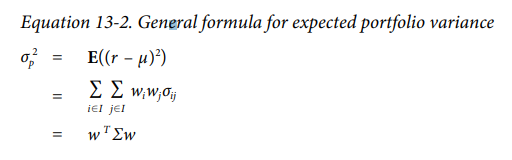

NumPy ベクトル化機能を多用すると単一のコードで書くことができる

np.dot() 関数は、2つのベクトル/行列の内積を返します。

T 属性または transpose() メソッドは、ベクトルまたは行列の転置を返します。

ポートフォリオの分散が与えられれば、(期待) ポートフォリオ標準偏差またはボラティリティ 

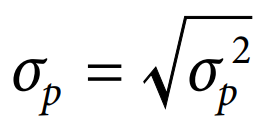

は、1平方根だけ離れています。


In [16]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

# 与えられたポートフォリオの重みによる年率ポートフォリオ分散

np.float64(0.013478974615362193)

In [17]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

# 与えられたポートフォリオの重みによる年率ポートフォリオボラリティ

0.11609898628051062

これで、平均分散ポートフォリオ選択のためのツールセットがほぼ完成しました。

投資家にとって最も重要なのは、特定の金融商品セットでどのようなリスク・リターン・プロファイルが可能かであり、その統計特性がどうなるかです。

この目的のために、次のコードではモンテカルロシミュレーションを実装して、より大規模なランダムポートフォリオの重みベクトルを生成します。

シミュレートされた割り当てごとに、コードは結果として得られるの期待ポートフォリオ収益と分散を記録します。

コードを簡素化するために、port_ret() と port_vol() という2つの関数が定義されています。

## 補足：port_ret() ：ポートフォリオの年間期待リターン（Expected Portfolio Return） を計算する関数

🔹 引数
weights: 各資産のポートフォリオ内の割合を表す 重みベクトル（numpy 配列）。

例えば、3つの資産のポートフォリオで weights = np.array([0.5, 0.3, 0.2]) なら、
- 50% の資産1
- 30% の資産2
- 20% の資産3
に配分されていることを意味します。

🔹 変数
- rets: 各資産の 日次リターン（returns） を含む pandas.DataFrame か numpy 配列（関数外部で定義されている）。
  - rets.mean() は、各資産の 日次リターンの平均値 を計算。
  - rets.mean() * weights は、ポートフォリオの日次期待リターン を計算。
  - np.sum(rets.mean() * weights) は、各資産の寄与を合計して、ポートフォリオ全体の日次期待リターン を求める。


🔹 期待リターンの年間換算
  - 252 は、株式市場の年間取引日数（252日） を考慮して、年間リターンに変換するための補正。

📌 計算の流れ
- 日次リターンの計算
  - rets.mean() で各資産の日次リターンの平均値を取得。
- ポートフォリオの日次期待リターン
  - 各資産の平均日次リターンと重み weights を掛け算し、合計。
- 年間期待リターン
  - 252（年間取引日数）を掛けて、日次リターンを年間リターン に変換。

In [18]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

## 補足：port_vol()：ポートフォリオの年間ボラティリティ（標準偏差） を計算する関数

🔹 引数
- weights: ポートフォリオの資産配分（重みベクトル） を表す numpy 配列
  - 例: weights = np.array([0.5, 0.3, 0.2])（各資産の配分）
🔹 変数
- rets: 各資産の 日次リターン を含む pandas.DataFrame または numpy 配列。
- rets.cov(): 日次リターンの共分散行列 を取得（各資産のリスクと相関関係を反映）。
- rets.cov() * 252: 年間共分散行列 に変換（市場の年間取引日数 252 日を掛ける）。


この関数は、ポートフォリオの標準偏差（ボラティリティ）を分散共分散行列を用いて計算 しています。

1. 年間共分散行列の計算

- rets.cov() は各資産の日次リターンの共分散行列 を計算。
- rets.cov() * 252 により年間リスクに変換。

2. ポートフォリオの分散の計算
- 二次形式 を利用し、ポートフォリオ全体の分散（リスクの合成）を求める：

$
\sigma ^2 = w ^T \sum w
$

ここで
- 𝑤は weights（ポートフォリオの重みベクトル）
- Σは rets.cov() * 252（年間共分散行列）

標準偏差（ボラティリティ）の計算

ポートフォリオの標準偏差 を求めるために、np.sqrt() で平方根を取る：

$
\sigma = \sqrt{w ^T \sum w}
$
​
 
これにより、ポートフォリオの年間ボラティリティ（リスク） が得られる。

In [19]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [20]:
prets = []
pvols = []

# ポートフォリオの重みのモンテカルロシミュレーション
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    
    # listオブジェクトに結果の統計量を格納する
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

下記の図にはモンテカルロシミュレーションの結果を示しています。

さらに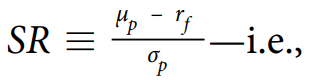

で定義されるシャープ・レシオ。

すなわち無リスクの短期金利（$ r_{f}）$ のポートフォリオの基地超過収益を、ポートフォリオの期待標準偏差で割ったものの結果も示す。

**簡略化のため以下のような式を仮定する。**

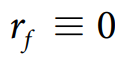

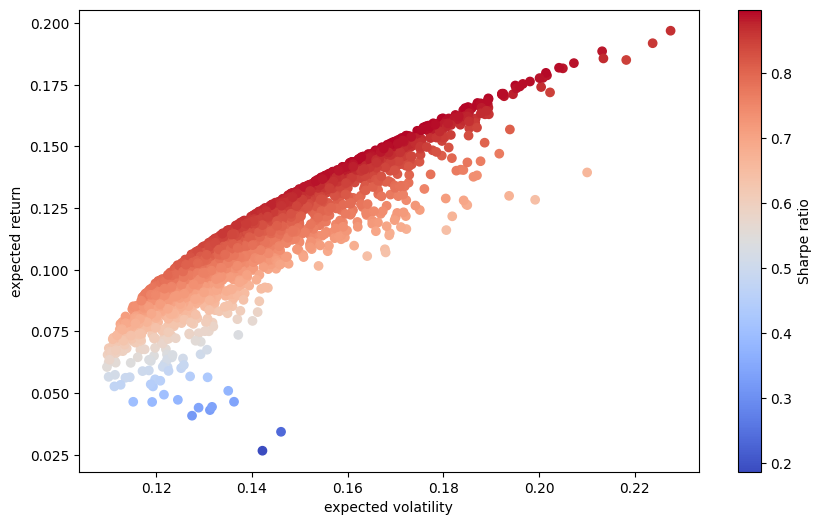

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

上記の図を見れば明らかなように、すべての重み分布で平均とボラティリティを測定した場合、そのすべてが良い結果を示すわけではない。

例えば、15％という一定の固定リスクレベルに対して、異なるリターンを示す複数のポートフォリオが存在する。

投資家は一般的に、一定のリスク水準で最大のリターン、あるいは一定のリターン期待値で最小のリスクに関心があります。

このようなポートフォリオの集合が、いわゆる**効率的フロンティア** を構成する。

これは以下のセクションで後述する。

# Portfolio Optimizations（最適ポートフォリオ）

この最小化関数は非常に一般的であり、パラメータに**等式制約、不等式制約、数値的限界** を設定するします。

まず、シャープレシオの最大化である。

形式的には、シャープレシオの負の値を最小化し、最大値と最適なポートフォリオ構成を導出する。

制約条件は、すべてのパラメータ（ウェイト）の合計が1になることであり、これは、minimize()関数の慣例を用いて定式化することができる。

引数値(重み)は0から1の間になるように制約される。

最適化関数の呼び出しに欠けている唯一の入力は、開始パラメータ リスト (重みベクトルの初期推定値) です。

重みを均等に分散すると、次のようになります。

In [22]:
import scipy.optimize as sco

In [23]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

# 最小化する関数

In [24]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
# 等価制約

In [59]:
bnds = tuple((0, 1) for x in range(noa))  

# パラメータ限界（数値的限界）

In [26]:
eweights = np.array(noa * [1. / noa,])  
eweights  

# 等重みベクトル

array([0.25, 0.25, 0.25, 0.25])

In [27]:
min_func_sharpe(eweights)

np.float64(-0.8436203363155398)

関数が返すのは最適パラメータ値だけではありません。

結果は opts というオブジェクトに保存されます。主な関心事は、最適なポートフォリオ構成を取得することです。

この目的のために、関心のあるキー (この場合は x) を指定して結果オブジェクトにアクセスします。

In [28]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

# 最適化。sharpe関数の最小化

CPU times: total: 46.9 ms
Wall time: 60.9 ms


In [29]:
opts  

# 最適化の結果

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8976673894146999
       x: [ 5.119e-01  1.913e-01  2.545e-01  4.228e-02]
     nit: 6
     jac: [ 8.966e-05  8.305e-05 -2.459e-04  1.929e-05]
    nfev: 30
    njev: 6

In [30]:
opts['x'].round(3)  

# 最適ポートフォリオの重み

array([0.512, 0.191, 0.255, 0.042])

In [31]:
port_ret(opts['x']).round(3)  

# 結果のポートフォリオ収益

np.float64(0.161)

In [32]:
port_vol(opts['x']).round(3)  

# 結果のポートフォリオボラリティ

np.float64(0.18)

In [33]:
port_ret(opts['x']) / port_vol(opts['x']) 

# 最大シャープ・レシオ 

np.float64(0.8976673894146999)

次にポートフォリオの分散最小化をする。これは、ボラリティの最小化と同じ

In [34]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [35]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.10942155263392025
       x: [ 0.000e+00  1.062e-03  5.433e-01  4.557e-01]
     nit: 9
     jac: [ 1.110e-01  1.095e-01  1.094e-01  1.094e-01]
    nfev: 45
    njev: 9

In [36]:
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [37]:
port_vol(optv['x']).round(3)

np.float64(0.109)

In [38]:
port_ret(optv['x']).round(3)

np.float64(0.06)

In [39]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.5504173670813887)

今回は、ポートフォリオは 3 つの金融商品のみで構成されています。このポートフォリオの組み合わせにより、いわゆる最小ボラティリティ ポートフォリオまたは最小分散ポートフォリオが実現します。

# Efficient Frontier（効率的フロンティア）

すべての最適ポートフォリオ、すなわち、与えられた目標リターン・レベルに対して最小のボラティリティを持つすべてのポートフォリオ（または、与えられたリスク・レベルに対して最大のリターンを持つすべてのポートフォリオ）の導出は、これまでの最適化と同様である。唯一の違いは、複数の開始条件を反復することである。

このアプローチは、目標とするリターン水準を定め、その水準ごとにボラティリティを最小にするポートフォリオの重みを導き出すものである。

最適化のために、これは2つの条件をもたらします：1つは目標リターンレベル、tretのためのものであり、もう1つは先ほどと同じようにポートフォリオウェイトの合計のためのものです。各パラメータの境界値は変わりません。異なるターゲット・リターン・レベル(tret)を反復するとき、最小化のための1つの条件が変わります。

これが、ループのたびに制約辞書が更新される理由です：

In [40]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [41]:
bnds = tuple((0, 1) for x in weights)

In [42]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: total: 906 ms
Wall time: 2.31 s


下記にはは最適化の結果を示しています。太線は、特定の目標収益を与えられた最適なポートフォリオを示しています。点は、前と同じようにランダムポートフォリオです。

さらに、図には2つの星が表示されています。

1つはボラティリティ/分散が最小のポートフォリオ (左端のポートフォリオ)、もう 1 つはシャープ比が最大のポートフォリオです。

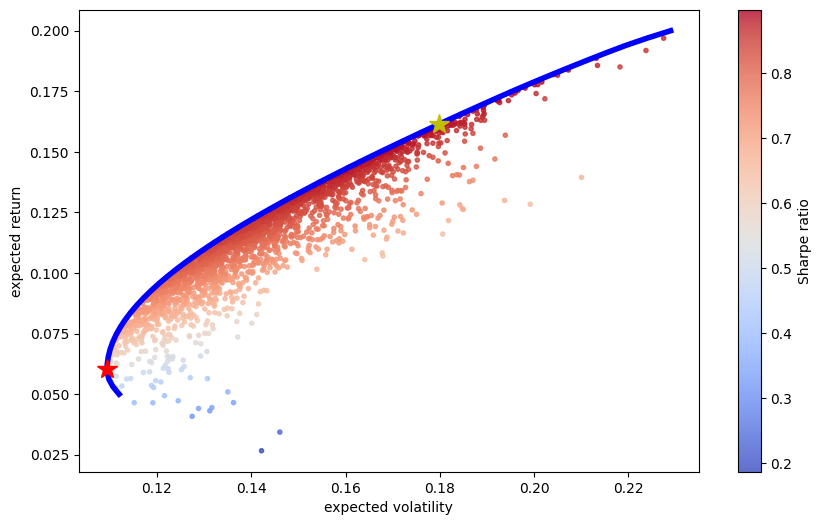

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

効率的フロンティアは、**絶対最小分散ポートフォリオよりも高いリターンを持つすべての最適ポートフォリオ**で構成されます。

これらのポートフォリオは、特定のリスクレベルを与えられた場合の期待リターンの点で、他のすべてのポートフォリオを上回ります。

# Capital Market Line（資本市場線）

株式やコモディティ（金など）のようなリスクのある金融商品に加えて、一般的には、現金または現金口座という普遍的でリスクのない投資機会が1つあります。

理想的な世界では、大手銀行の現金口座に預けられたお金はリスクがないとみなすことができます（たとえば、公的預金保険制度を通じて）。欠点は、このようなリスクのない投資では、通常、わずかなリターンしか得られず、ゼロに近いこともあります。

ただし、このようなリスクのない資産を考慮すると、投資家にとって効率的な投資機会が大幅に向上します。**基本的な考え方は、投資家が最初にリスクのある資産の効率的なポートフォリオを決定し、次にリスクのない資産をそのポートフォリオに追加すること**です。

リスクのない資産に投資する投資家の資産の割合を調整することで、リスクのない資産と効率的なポートフォリオの間の直線（リスクリターン空間）上にある任意のリスクリターンプロファイルを実現できます。

（多くのオプションのうち）どの効率的なポートフォリオに投資するのが最適でしょうか？これは、効率的フロンティアの接線がリスクのないポートフォリオのリスク リターン ポイントを正確に通過するポートフォリオです。たとえば、リスクのない金利 $r_{f},= 0.01$ を考えてみましょう。ポートフォリオは、リスク・リターン空間で接線がポイント $(\sigma _{f}, r_{f}) = (0, 0.01)$ を通過する効率的フロンティア上に存在します。

以下の計算では、効率的フロンティアの関数近似と1次導関数が使用されます。

3次スプライン補間は、このような微分可能な関数近似を提供します。

スプライン補間では、効率的フロンティアのポートフォリオのみが使用されます。

この数値アプローチにより、効率的フロンティアの連続微分可能関数 $f(x)$ と、それぞれの1次導関数$df(x)$を定義できます。

## 補足:3次スプライン補間とは

# 3次スプライン補間（Cubic Spline Interpolation）

## 📌 概要
3次スプライン補間とは、データ点を滑らかに結ぶ補間手法の一つで、**各区間を3次多項式で補間する**ことで、より自然で連続的な曲線を生成する方法です。

---

## 📌 特徴
1. **区分的3次多項式**
   - 各隣接するデータ点 \( (x_i, y_i) \) と \( (x_{i+1}, y_{i+1}) \) の間で、次の形の3次多項式を用いる：
     $
     S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
     $

2. **滑らかさの条件（連続性）**
   - 0次導関数（関数値）の連続性：
     $
     S_i(x_i) = y_i, \quad S_i(x_{i+1}) = y_{i+1}
     $
   - 1次導関数の連続性：
     $
     S_i'(x_{i+1}) = S_{i+1}'(x_{i+1})
     $
   - 2次導関数の連続性：
     $
     S_i''(x_{i+1}) = S_{i+1}''(x_{i+1})
     $

3. **端点条件（境界条件）**
   - **自然スプライン（Natural Spline）**：両端の2次導関数を0にする。
   - **固定端（Clamped Spline）**：両端の1次導関数を特定の値にする。

---

## 📌 メリット・デメリット
### ✅ **メリット**
- 滑らかで自然な補間ができる（直線補間よりスムーズ）
- 高次多項式補間よりも**振動が少ない**（ランゲージ現象の抑制）
- 計算コストが比較的低い（行列の解法で求められる）

### ❌ **デメリット**
- 線形補間より計算量が多い
- 範囲外の推定（外挿）は不安定

### Pythonでの3次スプライン補間の実装

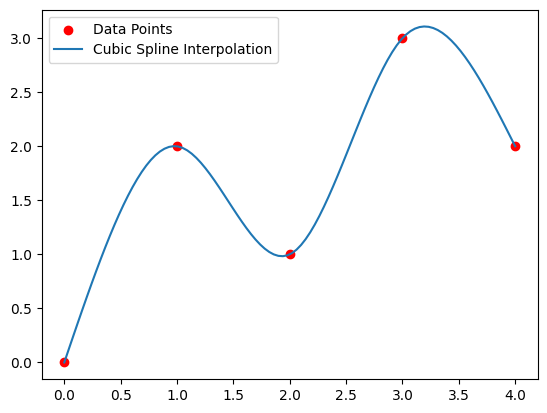

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# データ点
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 2, 1, 3, 2])

# 3次スプライン補間（自然スプライン）
cs = CubicSpline(x, y, bc_type='natural')

# 補間点
x_new = np.linspace(0, 4, 100)
y_new = cs(x_new)

# プロット
plt.scatter(x, y, color='red', label="Data Points")
plt.plot(x_new, y_new, label="Cubic Spline Interpolation")
plt.legend()
plt.show()


In [44]:
import scipy.interpolate as sci

In [45]:
ind = np.argmin(tvols)  
# 最小ボラリティポートフォリオの指数ポジション

evols = tvols[ind:]  
erets = trets[ind:]  
# 関連するポートフォリオボラリティと収益値


In [46]:
tck = sci.splrep(evols, erets)  
# これら３つの値のスプライン補完


In [47]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

ここで導出すべきは、リスク・リターン空間で無リスク資産を通過し、効率的フロンティアに接する線を表す線形関数 
t(x) = a + b · x です。式 13-3 は、関数 t(x) が満たす必要のある 3 つの条件すべてを説明しています。

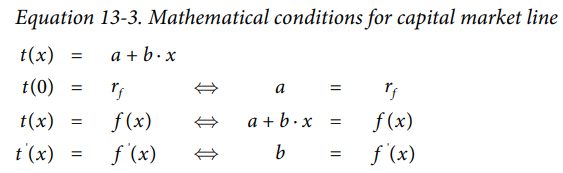


有効フロンティアやその 1 次導関数には閉じた公式がないため、式13-3の連立方程式を数値的に解く必要があります。そのためには、パラメータセット（引数集合） p = (a, b, x) が与えられた場合に3つの連立方程式すべての値を返すPython関数を定義します。

scipy.optimize の関数 sco.fsolve() は、このような連立方程式を解くことができます。関数equations() に加えて、初期パラメータ化が提供されます。

最適化の成否は初期パラメータ化に依存する可能性があることに注意してください。

**したがって初期パラメータ化は、一般的には推測と試行錯誤の組み合わせによって慎重に選択する必要があります。**

In [48]:
def equations(p, rf=0.01):
    
    # 資本市場線（CML）を記述する等式
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    
    return eq1, eq2, eq3

In [49]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  
# 所与の初期値でこれらの等式を解く

In [50]:
opt  
# 最適引数値の表示

array([0.01      , 0.84470952, 0.19525392])

In [51]:
np.round(equations(opt), 6)  
# 等式値はすべて0

array([ 0.,  0., -0.])

以下の図は結果をグラフで示しています。

星印は、接線がリスクのない資産点 $(0, r_{f}= 0.01)$ を通過する効率的フロンティアからの最適ポートフォリオを表しています。

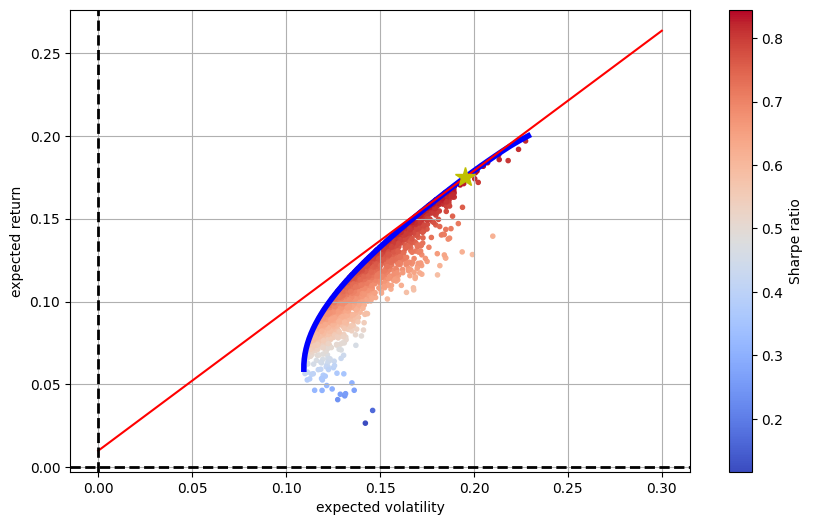

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_14.png')

# 資本市場線と無リスク利率1%の接点ポートフォリオ

最適（接線）ポートフォリオのポートフォリオウェイトは次のとおりです。4つの資産のうち3つだけが構成されています。

In [53]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
# 接線ポートフォリオの有効制約

res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [54]:
res['x'].round(3)  
# このポートフォリオの重み

array([0.59 , 0.221, 0.189, 0.   ])

In [55]:
port_ret(res['x'])

np.float64(0.17493284333583867)

In [56]:
port_vol(res['x'])

np.float64(0.1952537201232808)

In [57]:
port_ret(res['x']) / port_vol(res['x'])

np.float64(0.8959257894056422)

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>